# Linear Regression with Assumption Checks


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro



In [92]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [34]:
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [36]:

df.shape

(545, 13)

In [38]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [44]:

# Data Preprocessing

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Features & Target
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]


In [55]:
X.shape

(545, 13)

In [57]:
y.shape

(545,)

In [59]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [61]:
# Evaluation

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [63]:
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")



MAE: 970043.40
MSE: 1754318687330.66
RMSE: 1324506.96
R²: 0.6529


In [65]:
# Coefficients Interpretation
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)
print("\nFeature Coefficients:\n", coef_df)


Feature Coefficients:
                             Feature   Coefficient
2                         bathrooms  1.094445e+06
9               airconditioning_yes  7.914267e+05
8               hotwaterheating_yes  6.846499e+05
10                     prefarea_yes  6.298906e+05
3                           stories  4.074766e+05
7                      basement_yes  3.902512e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
4                           parking  2.248419e+05
1                          bedrooms  7.677870e+04
0                              area  2.359688e+02
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05


In [75]:
pd.DataFrame(X.columns,lr.coef_)

,0
2.359688e+02,area
7.677870e+04,bedrooms
1.094445e+06,bathrooms
4.074766e+05,stories
2.248419e+05,parking
3.679199e+05,mainroad_yes
2.316100e+05,guestroom_yes
3.902512e+05,basement_yes
6.846499e+05,hotwaterheating_yes
7.914267e+05,airconditioning_yes


In [71]:
lr.intercept_

260032.35760741401

# checking for assumptions

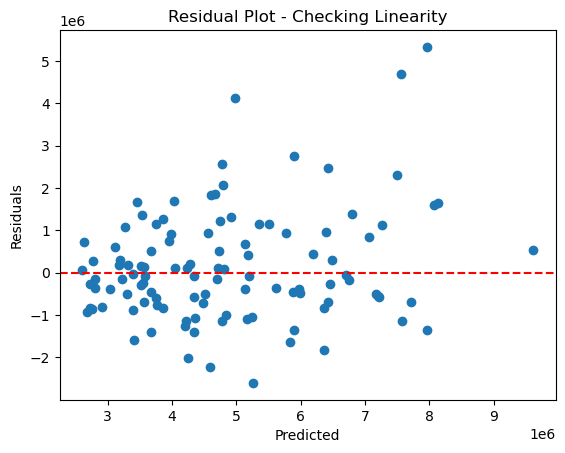

In [78]:
# 1. Linearity & Residual Plot
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot - Checking Linearity")
plt.show()


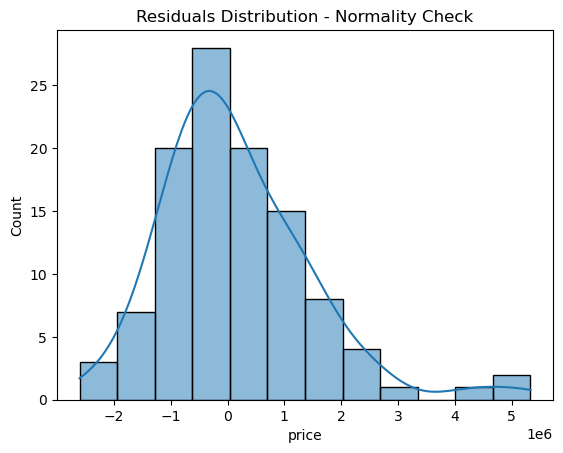

In [80]:
# 2. Normality of Residuals
sns.histplot(y_test - y_pred, kde=True)
plt.title("Residuals Distribution - Normality Check")
plt.show()

